In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy import sin, cos, pi, degrees, radians
tau = 2 * pi

In [2]:
class Circle:
    def __init__(self, x, y, r):
        self.x = x
        self.y = y
        self.r = r

def intersects(x0, y0, r0, x1, y1, r1):
    d = ((x1 - x0)**2 + (y1 - y0)**2)**0.5
    if d > r0 + r1 :# non intersecting
        print('non intersects')
        return None
    if d < abs(r0 - r1):# One circle within other
        print('within')
        return None
    if d == 0 and r0 == r1:# coincident circles
        print('coincident')
        return None
    else:
        a = (r0**2 - r1**2 + d**2) / (2*d)
        h = (r0**2 - a**2)**0.5
        x2 = x0 + a*(x1 - x0) / d   
        y2 = y0 + a*(y1 - y0) / d   
        x3 = x2 + h*(y1 - y0) / d     
        y3 = y2 - h*(x1 - x0) / d
        x4 = x2 - h*(y1 - y0) / d
        y4 = y2 + h*(x1 - x0) / d       
        return [x3, y3], [x4, y4]
    
def Plot(LV):
    fig, ax = plt.subplots(figsize = (5,5))
    ax.axis([-2, N, -2, N])
    ax.grid()
    ax.plot(TV[0], TV[1], 'rx', ms=10)
    for i in range(N):
        ax.add_patch(plt.Circle((LC[i].x, LC[i].y), LR[i], fill=False, color='b', ls='--', alpha=0.2)) # link circle
        ax.plot([LV[i][0],LV[i+1][0]],[LV[i][1],LV[i+1][1]], 'b-')
        ax.plot([LV[i][0],LV[i+1][0]],[LV[i][1],LV[i+1][1]], 'bo')
        s = 'LV[' + str(i+1) + ']'
        ax.text(LV[i+1][0]+0.1, LV[i+1][1], s, fontsize=8, color='b', ha='left', va='center')
    
    ax.add_patch(plt.Circle((CP[0], CP[1]), CR, fill=False, color='red', ls='--', alpha=0.4)) # base circle
    ax.plot([0,TV[0]], [0, TV[1]], 'r-', alpha=0.4) # T:horizontal line
    ax.plot([TV[0]/2, CP[0]], [TV[1]/2, CP[1]], 'r-', alpha=0.4) # T:perpendicular line
    ax.plot(CP[0], CP[1], 'r.')
    ax.text(TV[0], TV[1]-0.15, 'TV', fontsize=8, color='r', ha='center', va='top')
    ax.text(CP[0]+0.1, CP[1], 'CP', fontsize=8, color='r', ha='left', va='center')
    ax.text(LV[0][0], LV[0][1]-0.1, s='LV[0]=(0,0)', fontsize=8, color='b', ha='center', va='top')

<IPython.core.display.Javascript object>


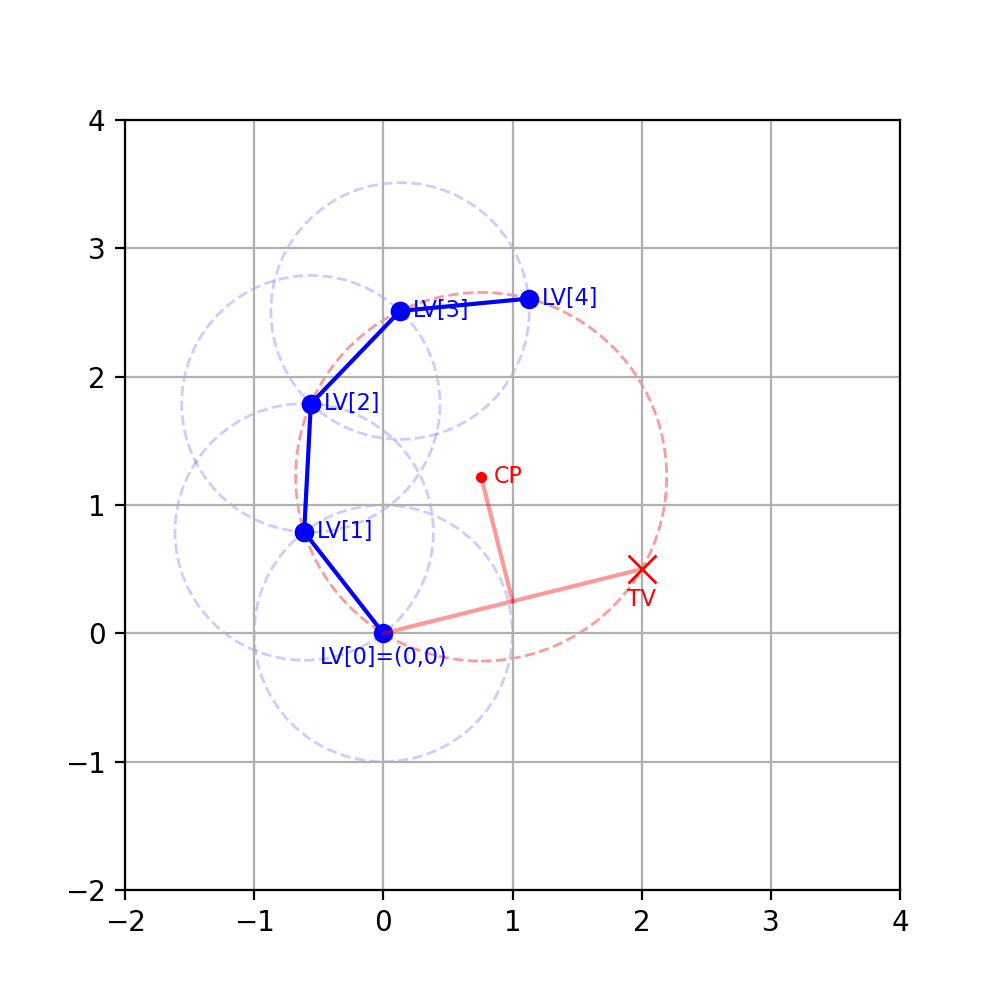

In [16]:
N = 4                     # the number of links
TV = np.array([2., 0.5])   # target vector
LR = [1.0] * N            # length(radius) of each link
# LR = [1.0 - i*0.1 for i in range(N)]  # case of different length
scaler = LR[0] / norm(TV)
CP = np.array([-TV[1], TV[0]]) * scaler + TV/2 # center point of the base circle
CR = norm(CP)  # radius of the base circle
C = Circle(CP[0], CP[1], CR) # base circle

LC = []
LV = [[0, 0]]
for i in range(N):
    LC.append(Circle(LV[i][0], LV[i][1], LR[i])) # link-circle
    v1, v2 = intersects(LV[i][0], LV[i][1], LR[i], C.x, C.y, C.r) # intersentions of link-circle and base-circle
    LV.append(v2) # list of the upper intersections of link-circle and base-circle

baseTheta = np.arctan2(TV[1]-CP[1], TV[0]-CP[0]) - np.arctan2(0-CP[1], 0-CP[0]) # angle at ((0,0), CP, TV)
linkTheta = np.arctan2(0-CP[1], 0-CP[0]) - np.arctan2(LV[-1][1]-CP[1], LV[-1][0]-CP[0]) # angle at ((0,0), CP, LV[N])
Thetas = baseTheta % tau + linkTheta % tau # sum of angles

Plot(LV)

Error: -5.5828773268373766e-05  loop: 11


<IPython.core.display.Javascript object>


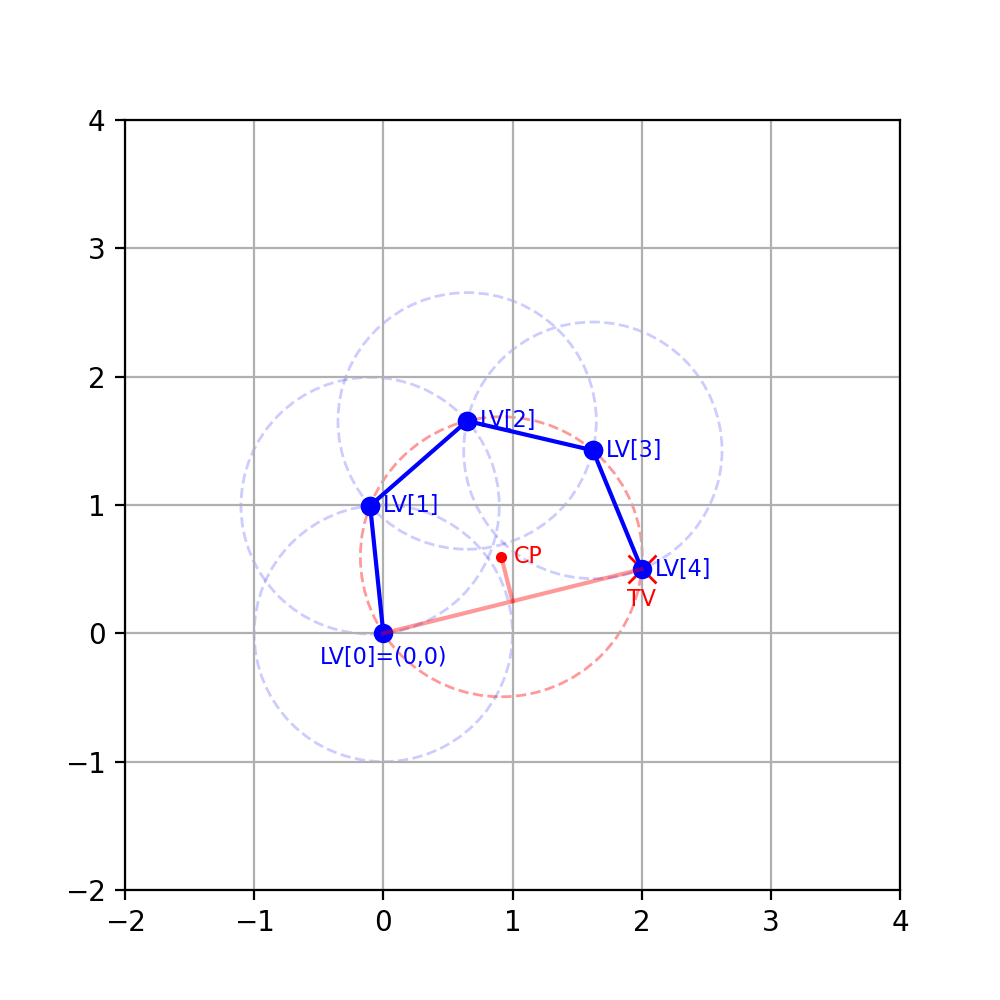

In [17]:
loop = 0
while True:
    Error = Thetas - tau
    if abs(Error) < 1e-4:
        print('Error:', Error, ' loop:', loop)
        break
    scaler += Error * 0.1
    CP = np.array([-TV[1], TV[0]]) * scaler + TV/2 # center point of the base circle
    CR = norm(CP)  # radius of the base circle
    C.x = CP[0]    # x-coordinate of the base circle
    C.y = CP[1]    # y-coordinate of the base circle
    C.r = CR
    for i in range(N):
        LC[i].x = LV[i][0] # x-coordinate of i-th link
        LC[i].y = LV[i][1] # y-coordinate of i-th link
        v1, v2 = intersects(LC[i].x, LC[i].y, LR[i], C.x, C.y, C.r)
        LV[i+1] = v2
        
    baseTheta = np.arctan2(TV[1]-CP[1], TV[0]-CP[0]) - np.arctan2(0-CP[1], 0-CP[0]) # angle at ((0,0), CP, TV)
    linkTheta = np.arctan2(0-CP[1], 0-CP[0]) - np.arctan2(LV[-1][1]-CP[1], LV[-1][0]-CP[0]) # angle at ((0,0), CP, LV[N])
    Thetas = baseTheta % tau + linkTheta % tau # sum of angles
    
    loop += 1
    if loop > 1000:
        print('1000 loops')
        break

Plot(LV)

In [13]:
1e-4

0.0001